In [2]:
import math, copy
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import cv2

In [3]:
import cv2
import skimage.transform as transform
from math import radians

class Transformations():
    '''A class for transforming images to assist in data augmentation. Performs tasks like
    
    done - Rotate 
    - Shear
    - Translations
    done - Colour transformations
    done - Resizing
    done - Cropping black space 
    done - Random cropping
    done - Adding noise 
    done - Removing noise 
    
    '''
    
    def shear_transformation(self, image_arr, angle):
        '''Function to perform shear transformation
        
        Arguments:
        
        1. image_arr: the input image (as a numpy array)
        2. angle: the angle to be 'sheared' by in degrees 
        
        Returns a transformed image array'''
        return_image = transform.warp(image_arr, inverse_map= transform.AffineTransform(shear = radians(angle)))
        return return_image

    def translation_transformation(self, image_arr, x = 0, y = 0):
        '''Function to perform translation
        
        Arguments:
        
        1. image_arr: the input image (as a numpy array)
        2. x: the ratio to the width for the image to be horizontally shifted by
        3. y: the ratio to the height for the image to be vertically shifted by
        
        Returns a transformed image array'''
        height, width = image_arr.shape[0], image_arr.shape[1]
        transformation = transform.AffineTransform(translation=(x*width, y*height))
        return transform.warp(image_arr, inverse_map= transformation)

    def color_transformation(self, image_arr, kind = 'default'):
        '''Function for transforming a RGB image to some other space specified by the 'kind' argument.
        
        Arguments: 
        
        1. image_arr: the input image (as a numpy array)
        2. kind : the transformation to be applied
        
        TODO: add types here
        
        Returns: The modified image (as a numpy array)
        
        **NOTE : HSV seems interesting**
        
        Consult here for transformations: https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html'''

        
        if kind == 'default':
            return image_arr

        elif kind == 'gray':
            return cv2.cvtColor(image_arr, cv2.COLOR_RGB2GRAY)

        elif kind == 'bgr':
            return cv2.cvtColor(image_arr, cv2.COLOR_RGB2BGR)
        
        elif kind == 'xyz':
            return cv2.cvtColor(image_arr, cv2.COLOR_RGB2XYZ)
        
        elif kind == 'YCrCb':
            return cv2.cvtColor(image_arr, cv2.COLOR_RGB2YCrCb)

        elif kind == 'HSV':
            return cv2.cvtColor(image_arr, cv2.COLOR_RGB2HSV)

        elif kind == 'Lab':
            return cv2.cvtColor(image_arr, cv2.COLOR_RGB2Lab)

        elif kind == 'Luv':
            return cv2.cvtColor(image_arr, cv2.COLOR_RGB2Luv)

        elif kind == 'HLS':
            return cv2.cvtColor(image_arr, cv2.COLOR_RGB2HLS)

        elif kind == 'YUV':
            return cv2.cvtColor(image_arr, cv2.COLOR_RGB2YUV)

        else:
            # default, do nothing
            return image_arr

    def rotate_transformation(self ,image_arr):
        '''Function for rotating an image by some random angle. and then cropping the image to remove black borders.
        
        Arguments: 
        
        1. image_arr: the input image (as a numpy array)
        
        Returns: The modified image (as a numpy array) '''
        num_rows, num_cols = image_arr.shape[:2]
        rotated_image = cv2.warpAffine(image_arr, cv2.getRotationMatrix2D((num_cols/2, num_rows/2), random.randint(0, 360), 1), (num_cols, num_rows))
        return rotated_image


    def crop_image(self, image_arr ,tolerance=0):
        '''Function for cropping an image by boundaries only.
        image is 2D or 3D image data
        Arguments: 
        
        1. image_arr: the input image (as a numpy array)
        2. tolerance: the tolerance for cropping
        
        Returns: The modified image (as a numpy array) '''
        mask = image_arr>tolerance
        if image_arr.ndim==3:
            mask = mask.all(2)
        m,n = mask.shape
        mask0,mask1 = mask.any(0),mask.any(1)
        col_start,col_end = mask0.argmax(),n-mask0[::-1].argmax()
        row_start,row_end = mask1.argmax(),m-mask1[::-1].argmax()
        return image_arr[row_start:row_end,col_start:col_end]

    def resize(self , image_arr , height , width):
        '''Function for resizing an image(2d/3d).
        Arguments: 
        
        1. image_arr: the input image (as a numpy array)
        2. height: desired height of the image
        3. width: desired width of the image
        
        Returns: The modified image (as a numpy array) '''
        return cv2.resize(image_arr,(height,width))

    def random_crop(self , image_arr , crop_height , crop_width):
        '''Function for randomly cropping an image(2d/3d).

        Warning - the crop height and crop width should be less then the image height and width respectively.
        # handle this as assert madhava
        Arguments: 
        
        1. image_arr: the input image (as a numpy array)
        2. crop_height: desired height of the image
        3. crop_width: desired width of the image
        
        Returns: The modified image (as a numpy array) '''
        
        height , width , _ = image_arr.shape
        max_x = image_arr.shape[1] - crop_width
        max_y = image_arr.shape[0] - crop_height
        x = np.random.randint(0, max_x)
        y = np.random.randint(0, max_y)
        crop = image_arr[y: y + crop_height, x: x + crop_width]
        crop = cv2.resize(crop, (width, height))
        return crop

    def adding_noise(self, image_arr , kind , std_devia = 1 , mean = 0):
        if kind == 'default':
            return image_arr

        elif kind == 'gaussian':
            num_height = 1
            if(len(image_arr.shape) > 2):
                num_height = image_arr.shape[2]
            num_rows, num_cols = image_arr.shape[:2]
            gauss_noise=np.zeros((num_rows,num_cols , num_height),dtype=np.uint8)
            print(gauss_noise.shape) , print(image_arr.shape)
            cv2.randn(gauss_noise,std_devia,mean)
            gauss_noise=(gauss_noise*0.5).astype(np.uint8)
            gn_img=cv2.add(image_arr,gauss_noise)
            return gn_img

        elif kind == 'uniform':
            num_height = 1
            if(len(image_arr.shape) > 2):
                num_height = image_arr.shape[2]
            num_rows, num_cols = image_arr.shape[:2]
            uni_noise=np.zeros((num_rows,num_cols, num_height),dtype=np.uint8)
            cv2.randu(uni_noise,0,255)
            uni_noise=(uni_noise*0.5).astype(np.uint8)
            un_img=cv2.add(image_arr,uni_noise)
            return un_img
        
        elif kind == 'impulse':
            num_height = 1
            if(len(image_arr.shape) > 2):
                num_height = image_arr.shape[2]
            num_rows, num_cols = image_arr.shape[:2]
            imp_noise=np.zeros((num_rows,num_cols , num_height),dtype=np.uint8)
            cv2.randu(imp_noise,0,255)
            imp_noise=cv2.threshold(imp_noise,245,255,cv2.THRESH_BINARY)[1]
            in_img=cv2.add(image_arr,imp_noise)
            return in_img

        else:
            # default, do nothing
            return image_arr

    def removing_noise(self, image_arr , kind):
        '''Function for denoising an image(2d/3d).
        Arguments: 
        
        1. image_arr: the input image (as a numpy array)
        2. kind: the kind of denoising you want to do
        
        Returns: The modified image (as a numpy array) '''
        if kind == 'default':
            return image_arr

        elif kind == 'gaussian':
            return cv2.GaussianBlur(image_arr,(3,3),0)

        elif kind == 'median':
            return cv2.medianBlur(image_arr,3)

        elif kind == 'bilateral':
            return cv2.bilateralFilter(image_arr,9,75,75)

        else:
            # default, do nothing
            return image_arr

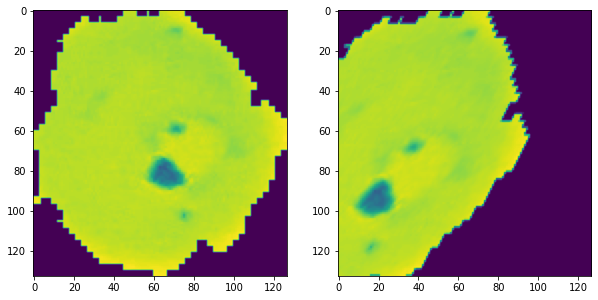

In [4]:
image_p = cv2.imread('parasitized1.png', 0)
image_up = cv2.imread('uninfected1.png', 0)

tr = Transformations()

fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].imshow(image_p)
axes[1].imshow(tr.shear_transformation(image_p, -30))

(133, 127, 1)
(133, 127)
(50, 50, 1)
(50, 50)


Text(0.5, 1.0, 'Unparasitized, random')

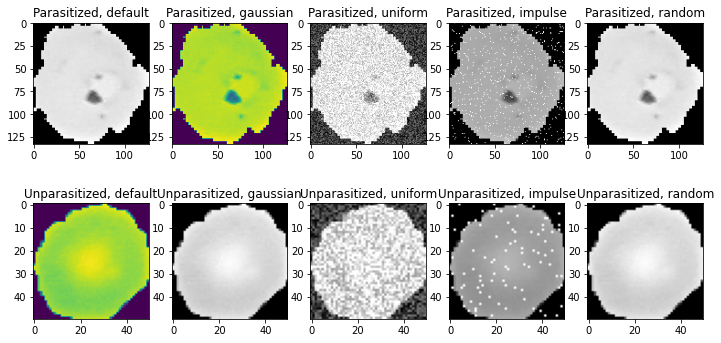

In [5]:
add_noise = ['default','gaussian','uniform' ,'impulse', 'test']

image_p = cv2.imread('parasitized1.png', 0)
image_up = cv2.imread('uninfected1.png', 0)

fig, axes = plt.subplots(2, 5, figsize = (12, 6))

tr = Transformations()

axes[0][0].imshow(image_p, cmap = 'gray')
axes[0][0].set_title('Parasitized, default')
axes[0][1].imshow(tr.adding_noise(image_p, add_noise[1]))
axes[0][1].set_title('Parasitized, gaussian')
axes[0][2].imshow(tr.adding_noise(image_p, add_noise[2]), cmap = 'gray')
axes[0][2].set_title('Parasitized, uniform')
axes[0][3].imshow(tr.adding_noise(image_p, add_noise[3]), cmap = 'gray')
axes[0][3].set_title("Parasitized, impulse")
axes[0][4].imshow(tr.adding_noise(image_p, add_noise[4]), cmap = 'gray')
axes[0][4].set_title("Parasitized, random")

axes[1][0].imshow(image_up)
axes[1][0].set_title('Unparasitized, default')
axes[1][1].imshow(tr.adding_noise(image_up, add_noise[1]), cmap = 'gray')
axes[1][1].set_title('Unparasitized, gaussian')
axes[1][2].imshow(tr.adding_noise(image_up, add_noise[2]), cmap = 'gray')
axes[1][2].set_title('Unparasitized, uniform')
axes[1][3].imshow(tr.adding_noise(image_up, add_noise[3]), cmap = 'gray')
axes[1][3].set_title("Unparasitized, impulse")
axes[1][4].imshow(tr.adding_noise(image_up, add_noise[4]), cmap = 'gray')
axes[1][4].set_title("Unparasitized, random")

(133, 127, 3)
(133, 127, 3)
(133, 127, 3)
(133, 127, 3)
(133, 127, 3)
(133, 127, 3)
(133, 127, 3)
(133, 127, 3)
(133, 127, 3)
(133, 127, 3)


Text(0.5, 1.0, 'Unparasitized, random')

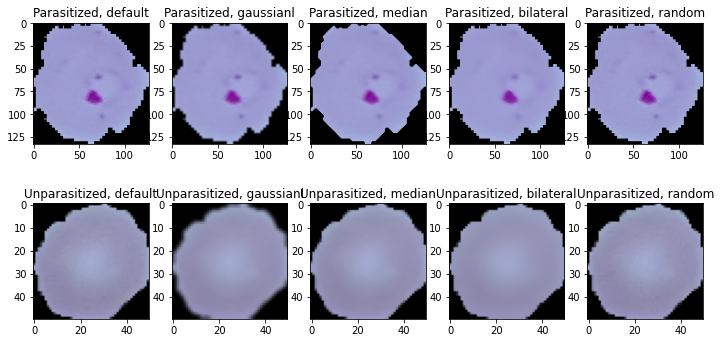

In [6]:
rem_noise = ['default','gaussian', 'median' ,'bilateral', 'test']


image_p = cv2.imread('parasitized1.png', -1)
image_up = cv2.imread('uninfected1.png', -1)

fig, axes = plt.subplots(2, 5, figsize = (12, 6))

tr = Transformations()

axes[0][0].imshow(tr.adding_noise(image_p, add_noise[1]))
axes[0][0].set_title('Parasitized, default')
axes[0][1].imshow(tr.removing_noise(tr.adding_noise(image_p, add_noise[1]), rem_noise[1]))
axes[0][1].set_title('Parasitized, gaussianl')
axes[0][2].imshow(tr.removing_noise(tr.adding_noise(image_p, add_noise[1]), rem_noise[2]))
axes[0][2].set_title('Parasitized, median')
axes[0][3].imshow(tr.removing_noise(tr.adding_noise(image_p, add_noise[1]), rem_noise[3]))
axes[0][3].set_title("Parasitized, bilateral")
axes[0][4].imshow(tr.removing_noise(tr.adding_noise(image_p, add_noise[1]), rem_noise[4]))
axes[0][4].set_title("Parasitized, random")

axes[1][0].imshow(image_up)
axes[1][0].set_title('Unparasitized, default')
axes[1][1].imshow(tr.removing_noise(image_up, rem_noise[1]))
axes[1][1].set_title('Unparasitized, gaussianl')
axes[1][2].imshow(tr.removing_noise(image_up, rem_noise[2]))
axes[1][2].set_title('Unparasitized, median')
axes[1][3].imshow(tr.removing_noise(image_up, rem_noise[3]))
axes[1][3].set_title("Unparasitized, bilateral")
axes[1][4].imshow(tr.removing_noise(image_up, rem_noise[4]))
axes[1][4].set_title("Unparasitized, random")

# axes[1][0].imshow(image_up)
# axes[1][0].set_title("Unparasitized, default")
# axes[1][1].imshow(cv2.cvtColor(image_up, cv2.COLOR_RGB2GRAY), cmap = 'gray')
# axes[1][1].set_title('Unparasitized, gaussian')
# axes[1][2].imshow(rgb_image_up)
# axes[1][2].set_title("Unparasitized, bilateral")
# axes[1][3].imshow(cv2.cvtColor(rgb_image_up, cv2.COLOR_RGB2GRAY), cmap = 'gray')
# axes[1][3].set_title("Unparasitized, median")
# axes[1][4].imshow(cv2.cvtColor(rgb_image_p, cv2.COLOR_RGB2GRAY), cmap = 'gray')
# axes[1][4].set_title("Parasitized, random")

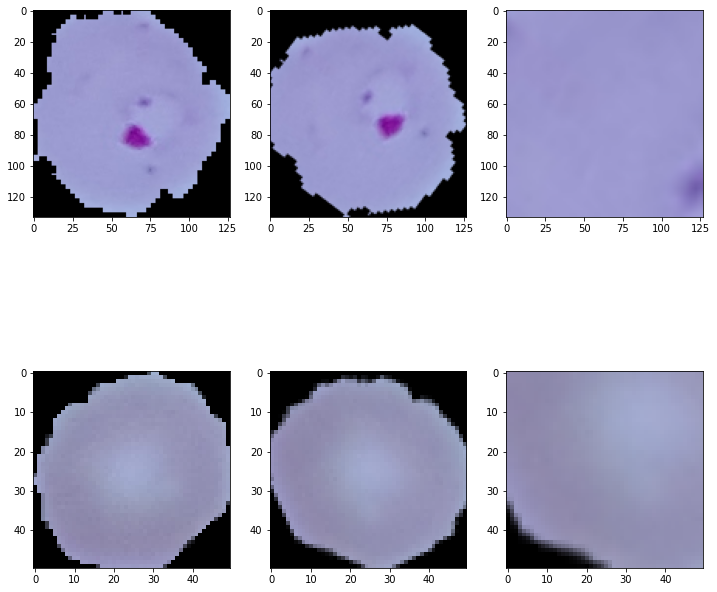

In [7]:
image_p = cv2.imread('parasitized1.png', -1)
image_up = cv2.imread('uninfected1.png', -1)

tr = Transformations()
fig, axes = plt.subplots(2, 3, figsize = (12, 12))
rotated_p = tr.rotate_transformation(image_p)
rotated_up = tr.rotate_transformation(image_up)
axes[0][0].imshow(image_p)
axes[0][1].imshow(rotated_p)
axes[0][2].imshow(tr.random_crop(rotated_p , 40 , 40))

axes[1][0].imshow(image_up)
axes[1][1].imshow(rotated_up)
axes[1][2].imshow(tr.random_crop(rotated_up , 30 , 30))

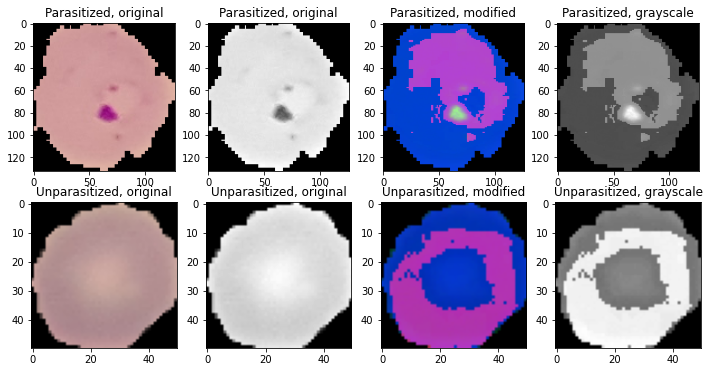

In [8]:
color_lst = ['default', 'gray', 'bgr', 'xyz', 'YCrCb', 'HSV', 'Lab', 'Luv', 'HLS', 'YUV', 'test']

image_p = cv2.imread('parasitized1.png', -1)[..., ::-1]
image_up = cv2.imread('uninfected1.png', -1)[..., ::-1]

transform = cv2.COLOR_RGB2HSV


rgb_image_p = cv2.cvtColor(image_p, transform)
rgb_image_up = cv2.cvtColor(image_up, transform)

fig, axes = plt.subplots(2, 4, figsize = (12, 6))
axes[0][0].imshow(image_p)
axes[0][0].set_title('Parasitized, original')
axes[0][1].imshow(cv2.cvtColor(image_p, cv2.COLOR_RGB2GRAY), cmap = 'gray')
axes[0][1].set_title('Parasitized, original')
axes[0][2].imshow(rgb_image_p)
axes[0][2].set_title('Parasitized, modified')
axes[0][3].imshow(cv2.cvtColor(rgb_image_p, cv2.COLOR_RGB2GRAY), cmap = 'gray')
axes[0][3].set_title("Parasitized, grayscale")

axes[1][0].imshow(image_up)
axes[1][0].set_title("Unparasitized, original")
axes[1][1].imshow(cv2.cvtColor(image_up, cv2.COLOR_RGB2GRAY), cmap = 'gray')
axes[1][1].set_title('Unparasitized, original')
axes[1][2].imshow(rgb_image_up)
axes[1][2].set_title("Unparasitized, modified")
axes[1][3].imshow(cv2.cvtColor(rgb_image_up, cv2.COLOR_RGB2GRAY), cmap = 'gray')
axes[1][3].set_title("Unparasitized, grayscale")

plt.savefig('../Plots/parasitized and ')

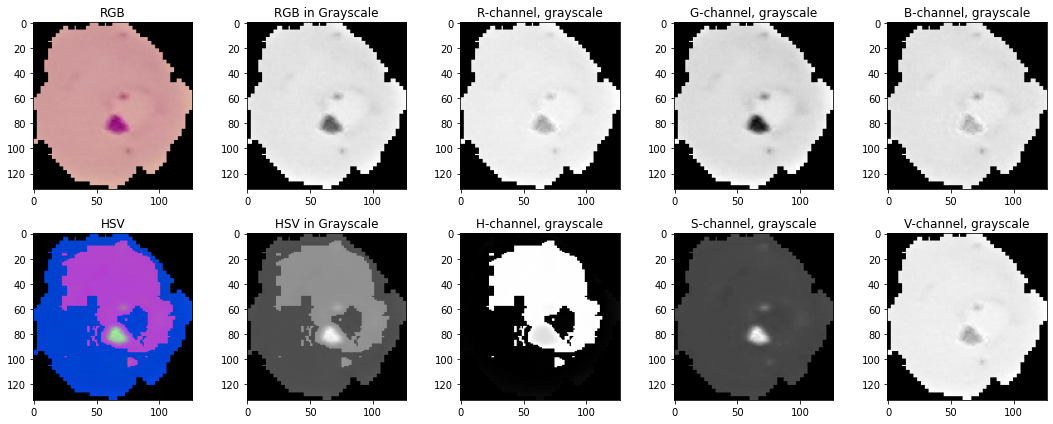

<Figure size 432x288 with 0 Axes>

In [17]:
from cv2 import COLOR_RGB2GRAY


color_lst = ['default', 'gray', 'bgr', 'xyz', 'YCrCb', 'HSV', 'Lab', 'Luv', 'HLS', 'YUV', 'test']

image = cv2.imread('parasitized1.png', -1)[..., ::-1]

transform = 'HSV'
t = Transformations()

image_t = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

fig, axes = plt.subplots(2, 5, figsize = (15, 6))
axes[0][0].imshow(image)
axes[0][0].set_title('RGB')
axes[0][1].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cmap = 'gray')
axes[0][1].set_title('RGB in Grayscale')
axes[0][2].imshow(image[:, :, 0], cmap = 'gray')
axes[0][2].set_title('R-channel, grayscale')
axes[0][3].imshow(image[:, :, 1], cmap = 'gray')
axes[0][3].set_title("G-channel, grayscale")
axes[0][4].imshow(image[:, :, 2], cmap = 'gray')
axes[0][4].set_title("B-channel, grayscale")

axes[1][0].imshow(image_t)
axes[1][0].set_title('HSV')
axes[1][1].imshow(cv2.cvtColor(image_t, cv2.COLOR_RGB2GRAY), cmap = 'gray')
axes[1][1].set_title('HSV in Grayscale')
axes[1][2].imshow(image_t[:, :, 0], cmap = 'gray')
axes[1][2].set_title('H-channel, grayscale')
axes[1][3].imshow(image_t[:, :, 1], cmap = 'gray')
axes[1][3].set_title("S-channel, grayscale")
axes[1][4].imshow(image_t[:, :, 2], cmap = 'gray')
axes[1][4].set_title("V-channel, grayscale")

plt.tight_layout()
plt.show()

plt.savefig('../Plots/Comparison between channels.png.png')

Text(0.5, 1.0, 'B-channel, grayscale')

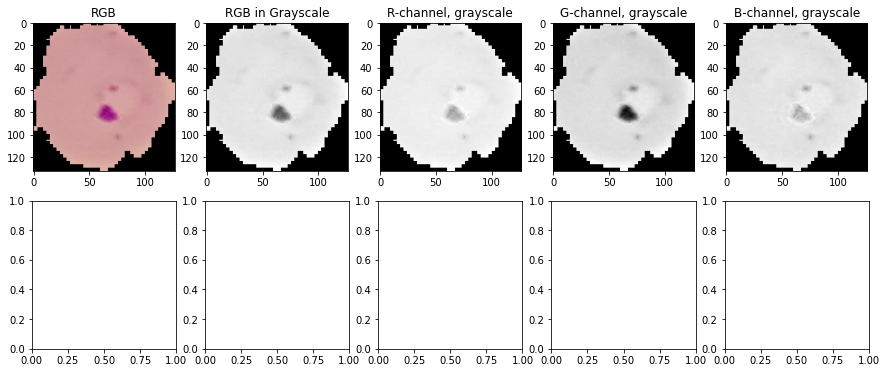

In [18]:
color_lst = ['default', 'gray', 'bgr', 'xyz', 'YCrCb', 'HSV', 'Lab', 'Luv', 'HLS', 'YUV', 'test']

image = cv2.imread('parasitized1.png', -1)[..., ::-1]

transform = 'HSV'
t = Transformations()

image_t = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

fig, axes = plt.subplots(2, 5, figsize = (15, 6))
axes[0][0].imshow(image)
axes[0][0].set_title('RGB')
axes[0][1].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cmap = 'gray')
axes[0][1].set_title('RGB in Grayscale')
axes[0][2].imshow(image[:, :, 0], cmap = 'gray')
axes[0][2].set_title('R-channel, grayscale')
axes[0][3].imshow(image[:, :, 1], cmap = 'gray')
axes[0][3].set_title("G-channel, grayscale")
axes[0][4].imshow(image[:, :, 2], cmap = 'gray')
axes[0][4].set_title("B-channel, grayscale")

In [ ]:
def resize(image , height , width):
    return cv2.resize(image,(height,width))